假设我们掷骰子，想知道看到1的几率有多大，而不是看到另一个数字。 如果骰子是公平的，那么所有六个结果 {1,...,6} 都有相同的可能发生， 因此我们可以说发生的概率为 1/6.

然而现实生活中，对于我们从工厂收到的真实骰子，我们需要检查它是否有瑕疵。 检查骰子的唯一方法是多次投掷并记录结果。 对于每个骰子，我们将观察到{1,...,6}
中的一个值。 对于每个值，一种自然的方法是将它出现的次数除以投掷的总次数， 即此事件（event）概率的估计值。 大数定律（law of large numbers）告诉我们： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。 让我们用代码试一试！

In [1]:
%matplotlib inline
import random
from mxnet import np, npx
from d2l import mxnet as d2l

npx.set_np()

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引 i 处的值是采样结果中 i 出现的次数。

In [2]:
fair_probs = [1.0 / 6] * 6
np.random.multinomial(1, fair_probs)

array([0, 0, 0, 1, 0, 0], dtype=int64)

In [3]:
fair_probs = [1.0 / 6] * 6
fair_probs

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [4]:
np.random.multinomial(10, fair_probs)

array([1, 1, 5, 1, 1, 1], dtype=int64)

In [5]:
counts = np.random.multinomial(1000, fair_probs).astype(np.float32)
counts / 1000

array([0.162, 0.149, 0.178, 0.17 , 0.166, 0.175])

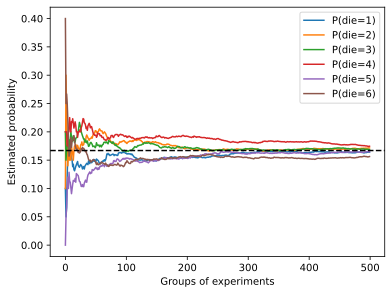

In [7]:
counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, c='black', ls='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [9]:
counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
cum_counts

array([[  3.,   3.,   0.,   1.,   0.,   3.],
       [  4.,   4.,   2.,   1.,   2.,   7.],
       [  7.,   6.,   2.,   3.,   4.,   8.],
       ...,
       [871., 792., 869., 828., 780., 840.],
       [874., 792., 869., 833., 781., 841.],
       [878., 792., 870., 835., 782., 843.]])

In [10]:
cum_counts.sum(axis=1, keepdims=True)

array([[  10.],
       [  20.],
       [  30.],
       [  40.],
       [  50.],
       [  60.],
       [  70.],
       [  80.],
       [  90.],
       [ 100.],
       [ 110.],
       [ 120.],
       [ 130.],
       [ 140.],
       [ 150.],
       [ 160.],
       [ 170.],
       [ 180.],
       [ 190.],
       [ 200.],
       [ 210.],
       [ 220.],
       [ 230.],
       [ 240.],
       [ 250.],
       [ 260.],
       [ 270.],
       [ 280.],
       [ 290.],
       [ 300.],
       [ 310.],
       [ 320.],
       [ 330.],
       [ 340.],
       [ 350.],
       [ 360.],
       [ 370.],
       [ 380.],
       [ 390.],
       [ 400.],
       [ 410.],
       [ 420.],
       [ 430.],
       [ 440.],
       [ 450.],
       [ 460.],
       [ 470.],
       [ 480.],
       [ 490.],
       [ 500.],
       [ 510.],
       [ 520.],
       [ 530.],
       [ 540.],
       [ 550.],
       [ 560.],
       [ 570.],
       [ 580.],
       [ 590.],
       [ 600.],
       [ 610.],
       [ 620.],
       [